**Binarization** -  Image binarization is the process of taking a grayscale image and converting it to black-and-white, essentially reducing the information

In [2]:
import cv2
from matplotlib import pyplot as plt

href = https://felixniklas.com/imageprocessing/binarization

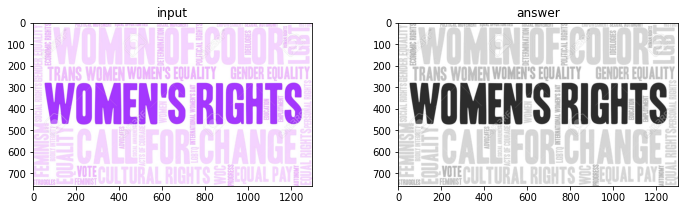

In [4]:
#img = "/content/c.jpg"
img = cv2.imread("/content/c.jpg")
img_gray = (cv2.cvtColor(img, cv2.COLOR_RGB2GRAY))
plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
plt.title('input')
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.title('answer')
plt.imshow(img_gray, cmap='gray')
plt.show()

Image thresholding is a form or segmentation, whereby an image is divided into constituent objects. This is a task commonly performed when trying to extract an object from an image

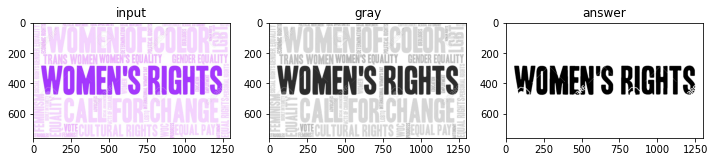

In [5]:
# image threshold
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
th, img_bin = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1)
plt.title('input')
plt.imshow(img)
plt.subplot(1, 3, 2)
plt.title('gray')
plt.imshow(img_gray, cmap='gray')
plt.subplot(1, 3, 3)
plt.title('answer')
plt.imshow(img_bin, cmap='gray')
plt.show()


# Otsu's binarization

In [6]:
img_gray.ravel()

array([253, 253, 253, ..., 255, 255, 255], dtype=uint8)

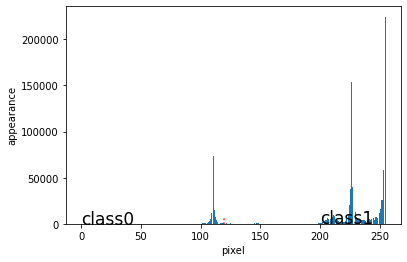

In [7]:
plt.hist(img_gray.ravel(), bins=255, rwidth=0.8, range=(0, 255))
plt.text(0, 50, 'class0', fontsize=17)
plt.text(200, 500, 'class1', fontsize=17)
plt.vlines(120, 0, 7000, color='red', linestyles='dotted')
plt.xlabel('pixel')
plt.ylabel('appearance')
plt.show()

threshold >> 174.0


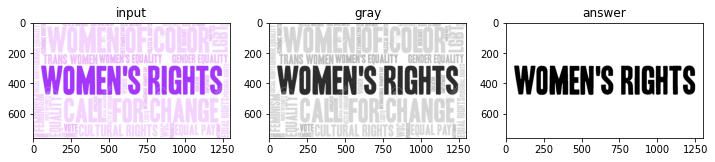

In [8]:
# automatic threshold
th, img_bin = cv2.threshold(img_gray, 0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print('threshold >>', th)

plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1)
plt.title('input')
plt.imshow(img)
plt.subplot(1, 3, 2)
plt.title('gray')
plt.imshow(img_gray, cmap='gray')
plt.subplot(1, 3, 3)
plt.title('answer')
plt.imshow(img_bin, cmap='gray')
plt.show()

HSL (for hue, saturation, lightness) and HSV (for hue, saturation, value; also known as HSB, for hue, saturation, brightness) are alternative representations of the RGB color model, HSL (for hue, saturation, lightness) and HSV (for hue, saturation, value; also known as HSB, for hue, saturation, brightness) are alternative representations of the RGB color model

# HUE 

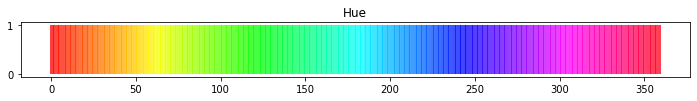

In [9]:
from matplotlib import cm
plt.figure(figsize=(12, 1))
plt.title('Hue')
for i in range(360):
    plt.vlines(i, 0, 1, color=cm.hsv(i / 360))
plt.show()

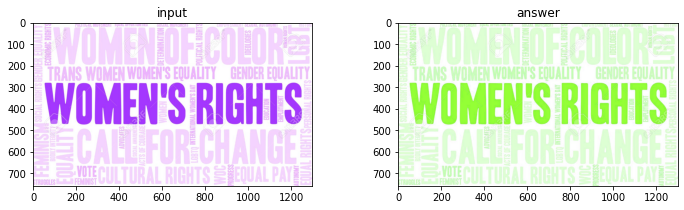

In [10]:
# opencv
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV) # RGB -> HSV
hsv[..., 0] = (hsv[..., 0] + 90) % 180 # Hue of opencv is defined [0, 180]
img_hsv = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB) # HSV -> RGB
plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
plt.title('input')
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.title('answer')
plt.imshow(img_hsv)
plt.show()

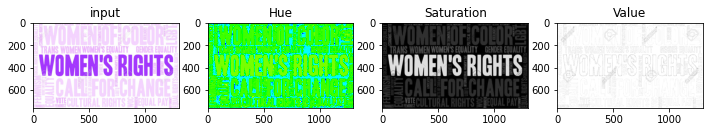

In [11]:
plt.figure(figsize=(12, 3))
plt.subplot(1, 4, 1)
plt.title('input')
plt.imshow(img)

plt.subplot(1, 4, 2)
plt.title('Hue')
plt.imshow(hsv[..., 0] / 360, cmap='hsv')

plt.subplot(1, 4, 3)
plt.title('Saturation')
plt.imshow(hsv[..., 1], cmap='gray')

plt.subplot(1, 4, 4)
plt.title('Value')
plt.imshow(hsv[..., 2], cmap='gray')

plt.show()


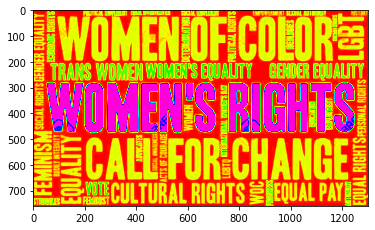

In [12]:
plt.imshow(hsv[..., 1] / 360, cmap='hsv')

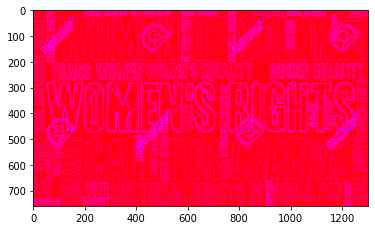

In [13]:
plt.imshow(hsv[..., 2] / 360, cmap='hsv')

Pooling is the process of extracting the features from the image output of a convolution layer.

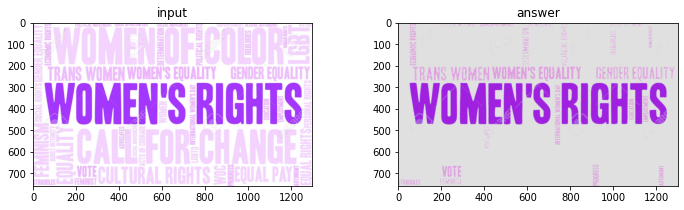

In [16]:
import numpy as np
def color_subtraction(img, div=4):
    th = 256 // div
    return np.clip(img // th * th + th // 2, 0, 255)

img_sub = color_subtraction(img) # color subtract

plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
plt.title('input')
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.title('answer')
plt.imshow(img_sub)
plt.show()


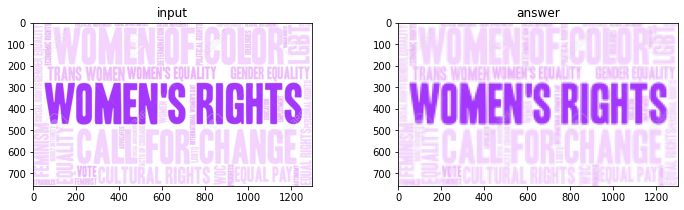

In [18]:
def pool_average(img, ksize_h=8, ksize_w=8):
    _img = img.copy().astype(np.float32)
    
    # padding
    h, w = img.shape[:2]
    outer_h = h % ksize_h
    pad_top = outer_h // 2
    pad_bottom = outer_h - pad_top
    outer_w = w % ksize_w
    pad_left = outer_w // 2
    pad_right = outer_w - pad_left
    
    _img = np.pad(_img, [(pad_top, pad_bottom), (pad_left, pad_right), (0, 0)], 'edge')
    out = np.zeros_like(_img)
    
    new_h, new_w = out.shape[:2]
    c = 1 if len(out.shape) == 2 else out.shape[2]
    
    # filtering
    for iy in range(0, new_h, ksize_h):
        for ix in range(0, new_w, ksize_w):
            for ic in range(c):
                out[iy : iy + ksize_h, ix : ix + ksize_w, ic] = _img[iy : iy + ksize_h, ix : ix + ksize_w, ic].mean()
            
    out = out[pad_top : pad_top + h, pad_left : pad_left + w]
    return np.clip(out, 0, 255).astype(np.uint8)

img_pool = pool_average(img) # pooling

plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
plt.title('input')
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.title('answer')
plt.imshow(img_pool)
plt.show()

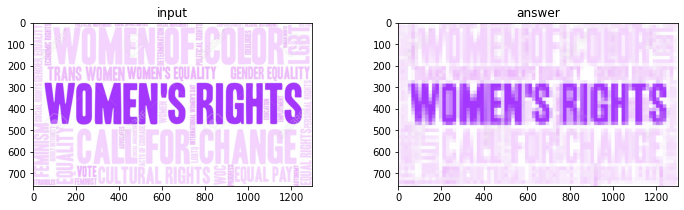

In [20]:
img_pool = pool_average(img, ksize_h=16, ksize_w=16) # pooling

plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
plt.title('input')
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.title('answer')
plt.imshow(img_pool)
plt.show()


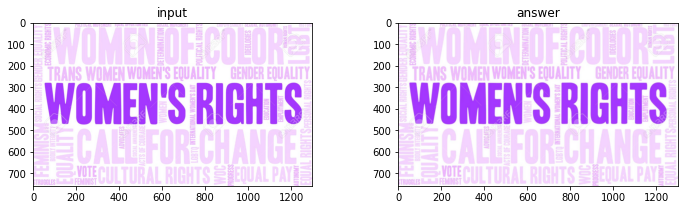

In [25]:
def filter_gaussian(img, ksize=(3, 3), sigma=1.3):
    _img = img.copy().astype(np.float32)
    ksize_h, ksize_w = ksize
    
    # padding
    h, w = img.shape[:2]
    pad_top, pad_bottom = ksize_h, ksize_h
    pad_left, pad_right = ksize_w, ksize_w
    
    _img = np.pad(_img, [(pad_top, pad_bottom), (pad_left, pad_right), (0, 0)], 'edge')
    out = np.zeros_like(_img)
    
    new_h, new_w = out.shape[:2]
    c = 1 if len(out.shape) == 2 else out.shape[2]
    
    # prepare kernel
    k = np.zeros([ksize_h, ksize_w])
    for iy in range(ksize_h):
        for ix in range(ksize_w):
            k[iy, ix] = 1 / (2 * np.pi * (sigma ** 2)) * np.exp(- ((ix - ksize_w // 2) ** 2 + (iy - ksize_h // 2) ** 2) / (2 * sigma ** 2))
 
    k /= k.sum()

    # filtering
    for iy in range(new_h - ksize_h):
        for ix in range(new_w - ksize_w):
            for ic in range(c):
                out[iy, ix, ic] = np.sum(_img[iy : iy + ksize_h, ix : ix + ksize_w, ic] * k)
            
    out = out[pad_top : pad_top + h, pad_left : pad_left + w]
    return np.clip(out, 0, 255).astype(np.uint8)

img_gau = filter_gaussian(img, (3, 3), 1.3)
plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
plt.title('input')
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.title('answer')
plt.imshow(img_gau)
plt.show()


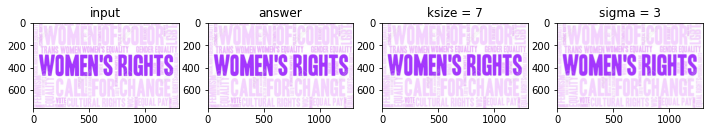

In [26]:
plt.figure(figsize=(12, 3))
plt.subplot(1, 4, 1)
plt.title('input')
plt.imshow(img)

plt.subplot(1, 4, 2)
plt.title('answer')
img_gau = filter_gaussian(img, (3, 3), 1.3)
plt.imshow(img_gau)

plt.subplot(1, 4, 3)
plt.title('ksize = 7')
img_gau = filter_gaussian(img, (7, 7), 1.3)
plt.imshow(img_gau)

plt.subplot(1, 4, 4)
plt.title('sigma = 3')
img_gau = filter_gaussian(img, (7, 7), 3)
plt.imshow(img_gau)
plt.show()
